# Titanic ML competition - EDA

## Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
import warnings

In [3]:
warnings.filterwarnings('ignore')

## EDA

In [4]:
train_data = pd.read_csv('../datasets/train.csv')
num_data = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data[num_data].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data['SurvivedStr'] = train_data['Survived'].replace({0: "No", 1: "Yes"})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedStr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No


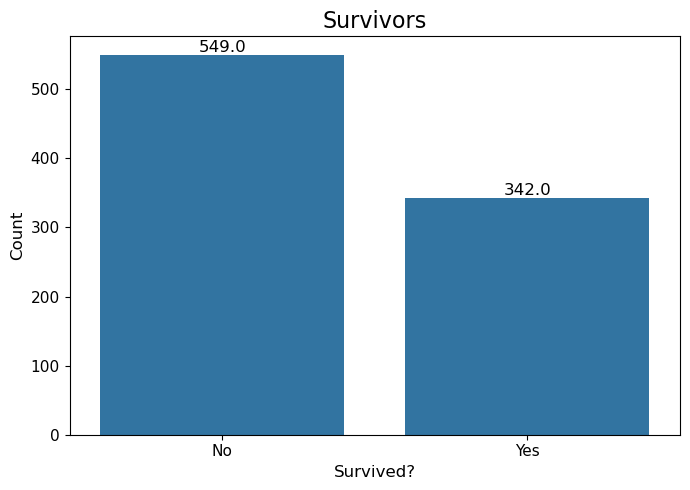

In [8]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='SurvivedStr')
plt.title('Survivors', fontsize=16)
plt.xlabel('Survived?', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.ylabel('Count', fontsize=12)
for p in graph.patches: #bars
    graph.annotate( #add text
        f'{p.get_height()}', #bar height = value
        (p.get_x() + p.get_width() / 2., p.get_height()), #value position
        ha='center', va='bottom', #align
        fontsize=12
    )
plt.tight_layout()
plt.show()

In [9]:
survived = train_data.query('Survived==1')
not_survived = train_data.query('Survived==0')

In [10]:
survived[num_data].describe()

,Pclass,Age,SibSp,Parch,Fare
count,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,0.000000,12.475000
50%,2.000000,28.000000,0.000000,0.000000,26.000000
75%,3.000000,36.000000,1.000000,1.000000,57.000000
max,3.000000,80.000000,4.000000,5.000000,512.329200


In [11]:
not_survived[num_data].describe()

,Pclass,Age,SibSp,Parch,Fare
count,549.000000,424.000000,549.000000,549.000000,549.000000
mean,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,39.000000,1.000000,0.000000,26.000000
max,3.000000,74.000000,8.000000,6.000000,263.000000


## Insight 1

The mean, maximum value and median of Pclass and Fare in the survivor table are higher than in the non-survivor table. <br>
This shows us that the social class of passengers can have a great influence on their survival. <br>
The remaing variables do not show considerable variations between the two tables.

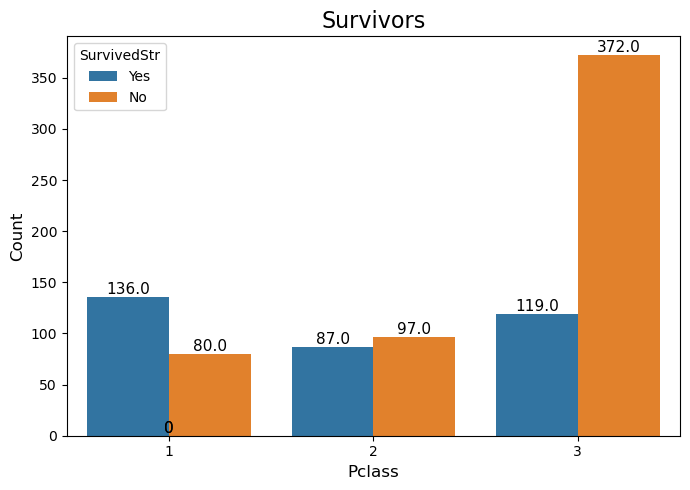

In [12]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='Pclass', hue='SurvivedStr')
plt.title('Survivors', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in graph.patches:
    graph.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )
plt.tight_layout()
plt.show()

In [13]:
train_data['FareLog2'] = np.log2(train_data['Fare'])
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedStr,FareLog2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,No,2.857981
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Yes,6.155492
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Yes,2.986411
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Yes,5.730640
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,No,3.008989


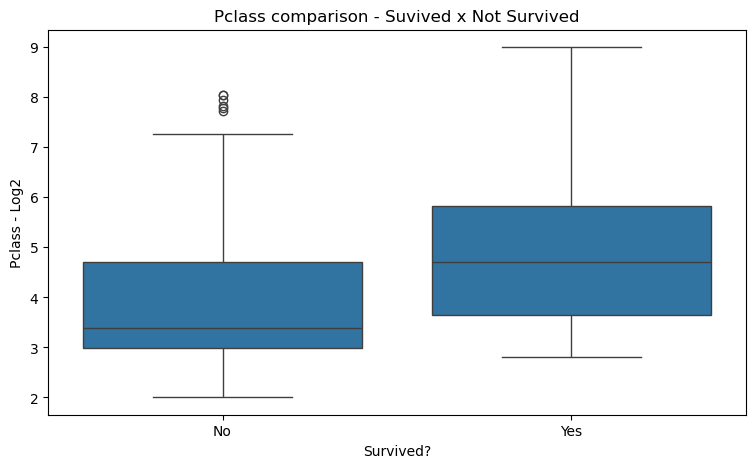

In [14]:
plt.figure(figsize=(9,5))
sns.boxplot(x='SurvivedStr', y='FareLog2', data=train_data)
plt.title('Pclass comparison - Suvived x Not Survived')
plt.xlabel('Survived?')
plt.ylabel('Pclass - Log2')
plt.show()

In [15]:
survived['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

In [16]:
not_survived['Sex'].value_counts()

Sex
male      468
female     81
Name: count, dtype: int64

## Insight 2
More women survived than men, which may indicate that gender has some influence on survival or not.

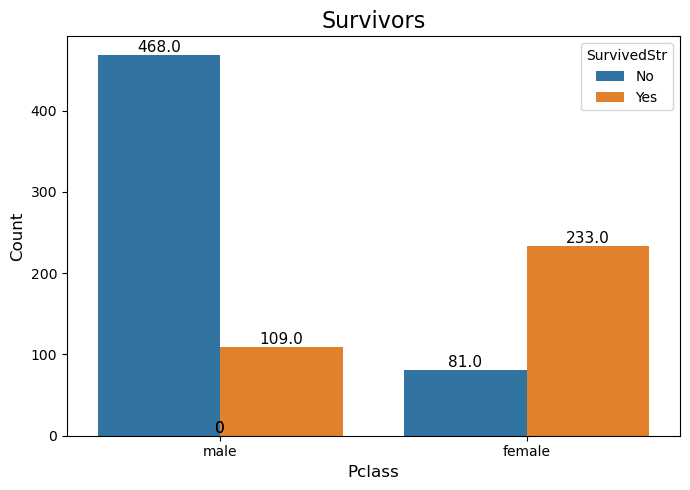

In [17]:
plt.figure(figsize=(7,5))
graph = sns.countplot(data=train_data, x='Sex', hue='SurvivedStr')
plt.title('Survivors', fontsize=16)
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)
for p in graph.patches:
    graph.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11
    )
plt.tight_layout()
plt.show()

## Hypotesis testing

### Woman survived more
H0 -> The proportion of female survivors is the same as of men.<br>
H1 -> The proportion of female survivors is greater than that of men.

In [18]:
contingency_table_sex = pd.crosstab(train_data['Sex'], train_data['Survived'])

In [19]:
chi2, p, dof, expected = chi2_contingency(contingency_table_sex)
print(f'Chi2: {round(chi2,2)}\np-value: {round(p,2)}')

Chi2: 260.72
p-value: 0.0


**Rejected H0**

### Passengers with higher Fare survived more

H0 -> The average Fare for survivors is the same as that non-survivors<br>
H1 -> The average Fare for survivors is higher than that for non-survivors

In [20]:
survived_fare = survived['Fare']
not_survived_fare = not_survived['Fare']

In [21]:
t_stat, p_value = ttest_ind(
    survived_fare, not_survived_fare, nan_policy='omit'
)
print(f't-value: {round(t_stat,2)}\np-value: {round(p_value,2)}')

t-value: 7.94
p-value: 0.0


**Rejected H0**

### Passengers in Pclass 1 survived more

In [22]:
contingency_table_pclass = pd.crosstab(
    train_data['Pclass'], train_data['Survived']
)

In [23]:
chi2_pclass, p_value, dof_pclass, expected_pclass = chi2_contingency(
    contingency_table_pclass
)
print(f'chi-2: {round(chi2_pclass,2)}\np-value: {round(p_value,2)}')

chi-2: 102.89
p-value: 0.0


**Rejected H0**

## Machine Learning Model - Random Forest

In [24]:
test_data = pd.read_csv('../datasets/test.csv')

In [25]:
y = train_data['Survived']
features = ['Sex', 'Pclass', 'Fare']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [26]:
model = RandomForestClassifier(
    n_estimators=100, max_depth=5, random_state=1
)
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

In [30]:
predictions = model.predict(X_test)
predictions[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [31]:
output = pd.DataFrame(
    {
        'PassengerId': test_data.PassengerId,
        'Survived': predictions
    }
)
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [32]:
output.to_csv('submission.csv', index=False)

**Score: 0.77751**